<img style="max-width:20em; height:auto;" src="../graphics/A-Little-Book-on-Adversarial-AI-Cover.png"/>

Author: Nik Alleyne   
Author Blog: https://www.securitynik.com   
Author GitHub: github.com/securitynik   

Author Other Books: [   

            "https://www.amazon.ca/Learning-Practicing-Leveraging-Practical-Detection/dp/1731254458/",   
            
            "https://www.amazon.ca/Learning-Practicing-Mastering-Network-Forensics/dp/1775383024/"   
        ]   


This notebook ***(gradient_descent_backpropagation_continued.ipynb)*** is part of the series of notebooks From ***A Little Book on Adversarial AI***  A free ebook released by Nik Alleyne   

### Lab Objectives:   
- Build on what we learned in the lab  ***Beginning Gradient Descent.ipynb***   
- Implement Gradient Descent from scratch   

### Step 1:   

In [1]:
# import the libraries  
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [2]:
# Setup some fake data for simple linear regression
# Here we have 4 samples with their targets
X = np.array([[-2], [5], [-4], [3], [5]])
y = np.array([0.92, 5, 2, 1, 2])
X, y

(array([[-2],
        [ 5],
        [-4],
        [ 3],
        [ 5]]),
 array([0.92, 5.  , 2.  , 1.  , 2.  ]))

Create our own Gradient Descent Class  
### Step 2:

In [14]:
# Implement Gradient Descent
class GradientDescent:
    def __init__(self, lr=0.1, n_iters=10) -> None:
        # Define the variables 
        self.lr = lr
        self.n_iters = n_iters
        self.cost_tracker = []
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        print('Training ...')
        num_samples, num_features = X.shape

        # Set the weights and bias to 0
        self.weights = np.zeros(num_features)
        self.bias = 0

        # repeat the forward and backward pass 
        for i in range(self.n_iters):
            # Make predictions on the entire dataset
            y_pred = np.dot(X, self.weights) + self.bias

            # Get the loss for the batch
            cost = np.sum((y_pred - y)**2) /num_samples

            # Append the loss to our loss_tracker
            self.cost_tracker.append(cost) 

            # Perform backpropagation
            # Calculate the loss with respect to the weights and biases
            dl_dw = (1/num_samples) * np.sum((y_pred-y) * X.T)
            dl_db = (1/num_samples) * np.sum(y_pred-y)

            # Perform Gradient Descent
            # update the weights and biases   
            self.weights = self.weights - (self.lr * dl_dw)
            self.bias = self.bias - (self.lr * dl_db)


            # Print the stats
            print(f'Epoch: {i+1}/{self.n_iters} \t loss: {cost} \t lr: {self.lr:.4f}')
        return self.weights, self.bias
    
    # Make the predictions
    def predict(self, X):
        print('Predicting ...')
        # using the parameters that were learned above
        return np.dot(X, self.weights) + self.bias
       

With our class built, we can now go ahead and train the network

### Step 3:  

In [15]:
# Instantiate the class
gradient_descent = GradientDescent()
gradient_descent.fit(X=X, y=y)

Training ...
Epoch: 1/10 	 loss: 6.96928 	 lr: 0.1000
Epoch: 2/10 	 loss: 5.075199615999999 	 lr: 0.1000
Epoch: 3/10 	 loss: 4.158210303488 	 lr: 0.1000
Epoch: 4/10 	 loss: 3.626619434297507 	 lr: 0.1000
Epoch: 5/10 	 loss: 3.2653462883384208 	 lr: 0.1000
Epoch: 6/10 	 loss: 2.9929526938398596 	 lr: 0.1000
Epoch: 7/10 	 loss: 2.7759753024195075 	 lr: 0.1000
Epoch: 8/10 	 loss: 2.5986282727662138 	 lr: 0.1000
Epoch: 9/10 	 loss: 2.4520117341419394 	 lr: 0.1000
Epoch: 10/10 	 loss: 2.330204469471537 	 lr: 0.1000


(array([0.25545422]), np.float64(1.1619089364807467))

Visualize the loss. We can see above the loss is decreasing. Which is what we want. It is always best to also visualize this to see the trend. 
### Step 4:

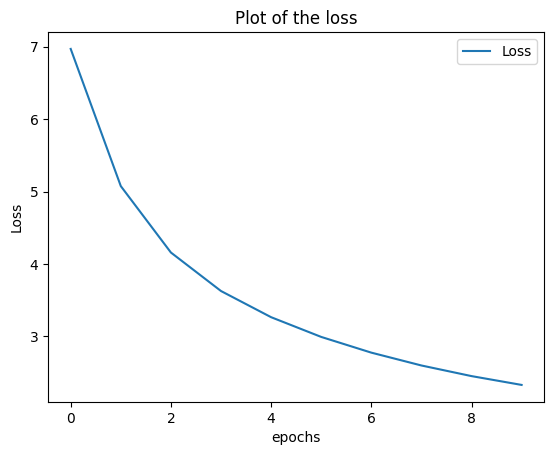

In [5]:
# plot the loss of the simple model
plt.title('Plot of the loss')
plt.plot(range(0, len(gradient_descent.cost_tracker), 1), gradient_descent.cost_tracker, label='Loss')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend();

### Lab Takeaways:   
- Implement Gradient Descent from scratch to learn about the training process  
- Visualize the training process. More specifically the loss  

Additional References:     
- https://github.com/SecurityNik/Data-Science-and-ML/blob/main/LinearRegression%20-%20Beginning%20Stochastic%20Gradient%20Descent.ipynb     
- https://github.com/SecurityNik/Data-Science-and-ML/blob/main/Continuing%20Back%20Propagation%20-%20Gradient%20Descent%20-%20Tf%20GradientTape%20and%20PyTorch.ipynb    
- https://github.com/SecurityNik/Data-Science-and-ML/blob/main/Continuing%20Back%20Propagation%20-%20Gradient%20Descent%20-%20Tf%20GradientTape%20and%20PyTorch.ipynb     

- https://github.com/SecurityNik/Data-Science-and-ML/blob/main/LinearRegression%20-%20Beginning%20Stochastic%20Gradient%20Descent.ipynb

